In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import csv

## 3.- Data Collection

In [2]:
df_failures = pd.read_csv("Data/Pdm_failures.csv")
print(df_failures.shape)
df_failures.head(2)

(761, 3)


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1


In [3]:
df_telemetry = pd.read_csv("Data/Pdm_telemetry.csv")
print(df_telemetry.shape)
df_telemetry.head(2)

(876100, 6)


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973


In [4]:
df=df_telemetry.merge(df_failures, how='left', on=['datetime', "machineID"])
df

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,NaN
...,...,...,...,...,...,...,...
876137,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,NaN
876138,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,NaN
876139,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,NaN
876140,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,NaN


In [5]:
df["failure"].value_counts(dropna=False)

NaN      875381
comp2       259
comp1       192
comp4       179
comp3       131
Name: failure, dtype: int64

## 4.- EDA


Tambien observamos que los datos no son balanceados (Así es el comportamiento normal)


Y por ultimo vemos que hay dos columnas que no nos estan dando mucho valor ¿Las puedes identificar?

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.shape)
df.head(3)

(876142, 7)


,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN


In [7]:
df.set_index(['datetime'], inplace=True)
print(df.shape)
df.head(3)

(876142, 6)


,machineID,volt,rotate,pressure,vibration,failure
datetime,,,,,,
2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN


In [8]:
df["machineID"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [9]:
maximos=[]
for i in df["machineID"].unique():  
    maximos.append(df[df["machineID"]==i].failure.value_counts().sum())

max_value = max(maximos)
machine=maximos.index(max_value)+1
print('numero de fallas:', max_value, "maquina:",machine )

numero de fallas: 19 maquina: 99


In [10]:
df[df["machineID"]==machine].failure.value_counts()

comp2    6
comp3    6
comp4    5
comp1    2
Name: failure, dtype: int64

In [11]:
df_98=df[df["machineID"]==machine]



In [12]:
df_98.drop("machineID", axis=1, inplace=True)
df_98

C:\Users\africa.rodriguez\Anaconda3\envs\Python_Fundamentals\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,volt,rotate,pressure,vibration,failure
datetime,,,,,
2015-01-01 06:00:00,168.596133,384.747105,110.921131,41.944692,NaN
2015-01-01 07:00:00,153.667693,441.288719,128.011446,39.271527,NaN
2015-01-01 08:00:00,178.319255,512.612661,128.526147,42.975412,NaN
2015-01-01 09:00:00,162.163821,493.356626,114.435754,40.044016,NaN
2015-01-01 10:00:00,180.201336,550.512296,110.771891,43.054530,NaN
...,...,...,...,...,...
2016-01-01 02:00:00,166.719608,462.956239,101.251044,44.450916,NaN
2016-01-01 03:00:00,168.434193,462.373730,98.379062,35.391502,NaN
2016-01-01 04:00:00,191.505730,418.940906,101.018747,43.204243,NaN


In [13]:
print(df_98.failure.unique())


[nan 'comp3' 'comp4' 'comp1' 'comp2']


In [14]:
df_98=df_98.fillna(0)
df_98

,volt,rotate,pressure,vibration,failure
datetime,,,,,
2015-01-01 06:00:00,168.596133,384.747105,110.921131,41.944692,0
2015-01-01 07:00:00,153.667693,441.288719,128.011446,39.271527,0
2015-01-01 08:00:00,178.319255,512.612661,128.526147,42.975412,0
2015-01-01 09:00:00,162.163821,493.356626,114.435754,40.044016,0
2015-01-01 10:00:00,180.201336,550.512296,110.771891,43.054530,0
...,...,...,...,...,...
2016-01-01 02:00:00,166.719608,462.956239,101.251044,44.450916,0
2016-01-01 03:00:00,168.434193,462.373730,98.379062,35.391502,0
2016-01-01 04:00:00,191.505730,418.940906,101.018747,43.204243,0


In [15]:
df_98["failure"]=df_98["failure"].replace("comp4", 4)
df_98["failure"]=df_98["failure"].replace("comp3", 3)
df_98["failure"]=df_98["failure"].replace("comp2", 2)
df_98["failure"]=df_98["failure"].replace("comp1", 1)
df_98["failure"].value_counts()

0    8742
3       6
2       6
4       5
1       2
Name: failure, dtype: int64

In [16]:
#df_98.to_csv("maquina_98.csv")

<AxesSubplot:xlabel='datetime'>

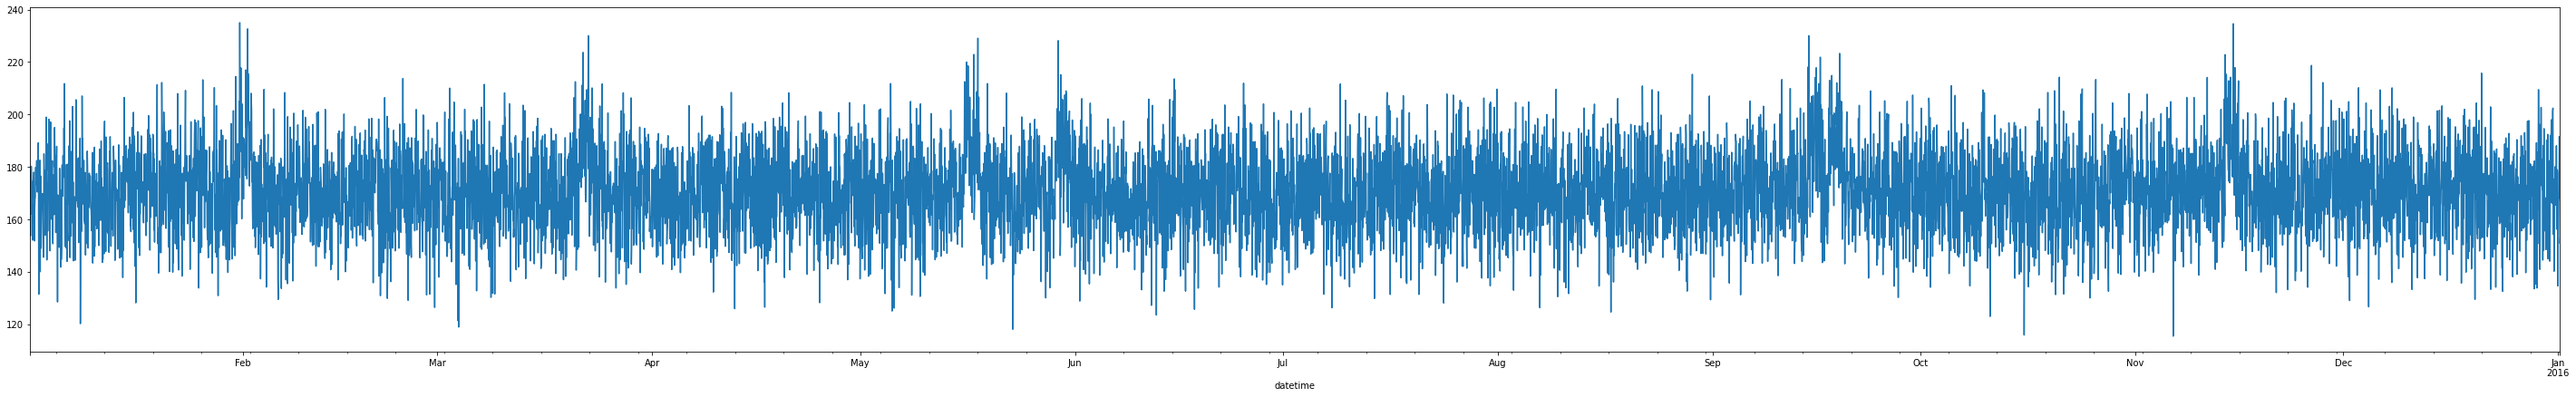

In [17]:
df.volt[df["machineID"]==machine].plot(figsize=(50,7))


<AxesSubplot:xlabel='datetime'>

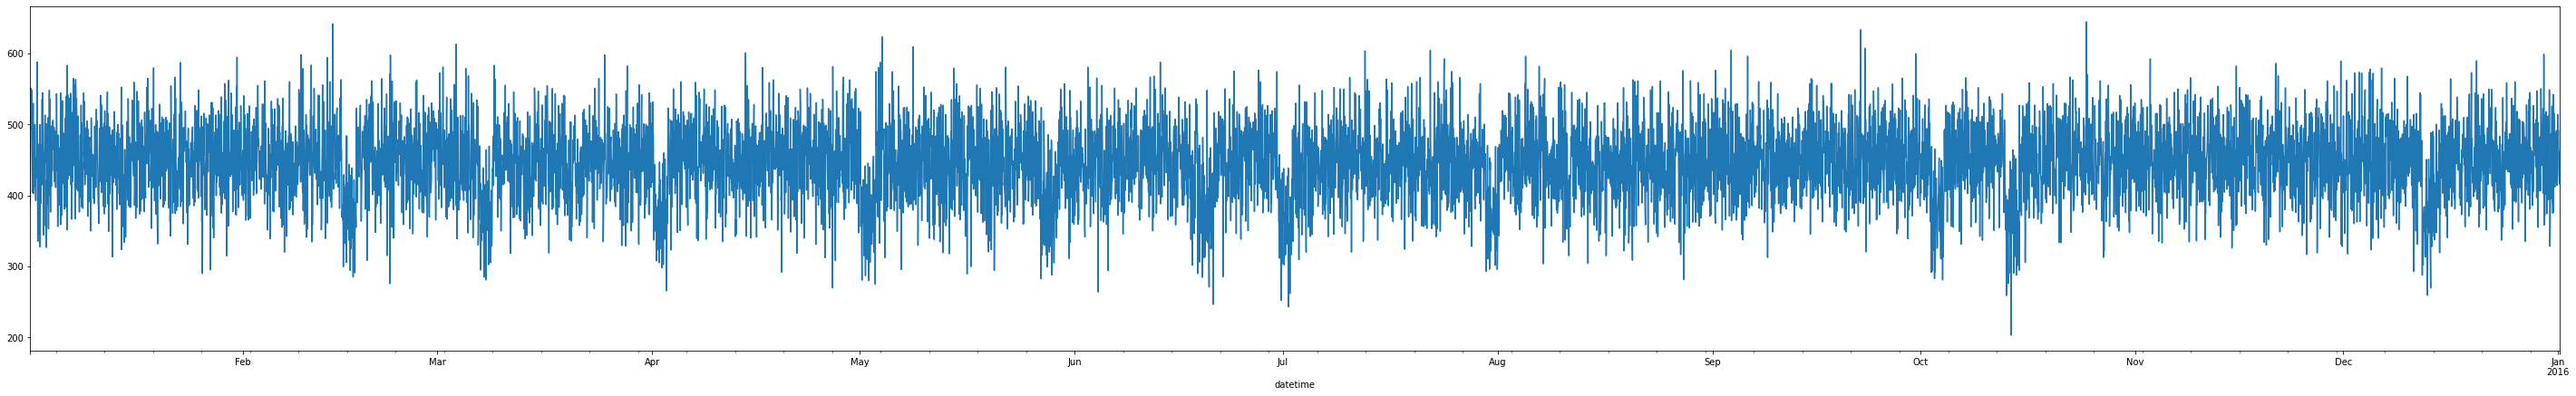

In [18]:
df.rotate[df["machineID"]==machine].plot(figsize=(50,7))

<AxesSubplot:xlabel='datetime'>

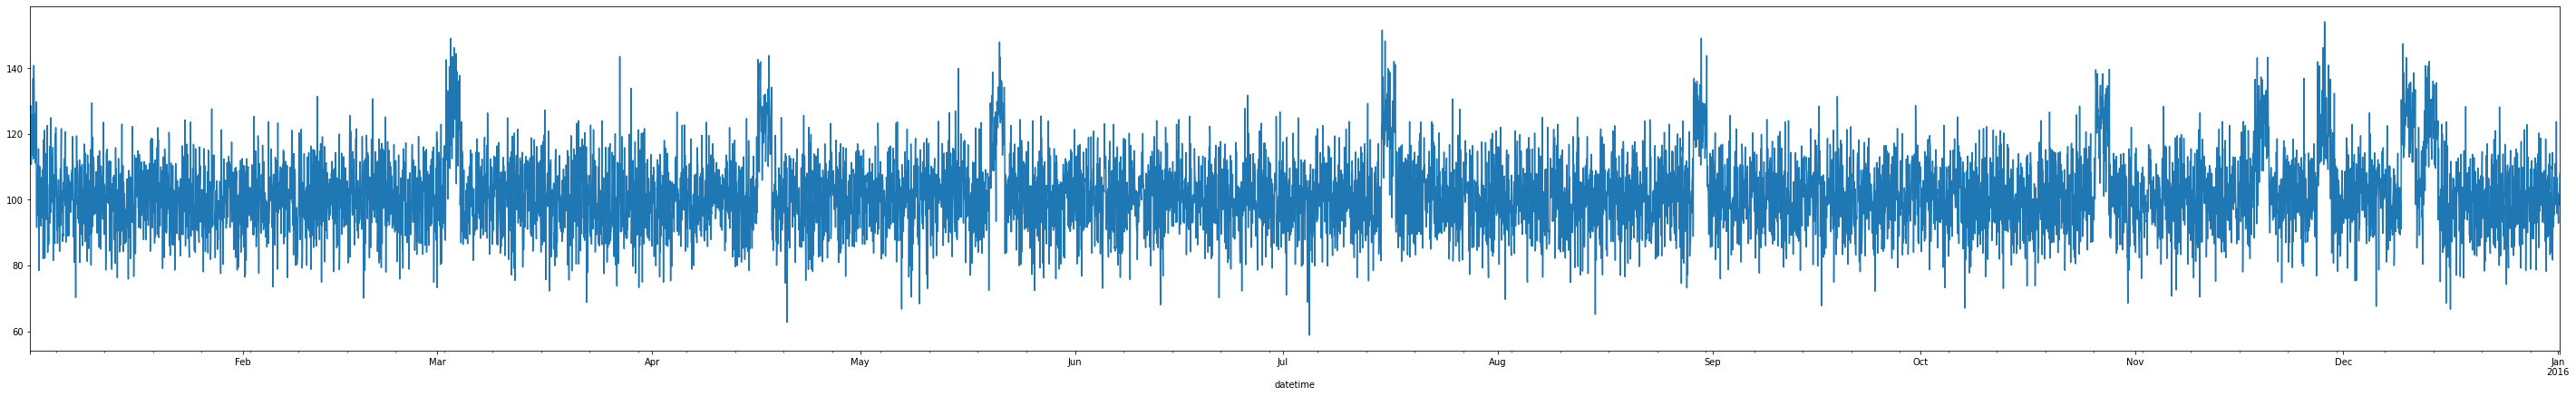

In [19]:
df.pressure[df["machineID"]==machine].plot(figsize=(50,7))

<AxesSubplot:xlabel='datetime'>

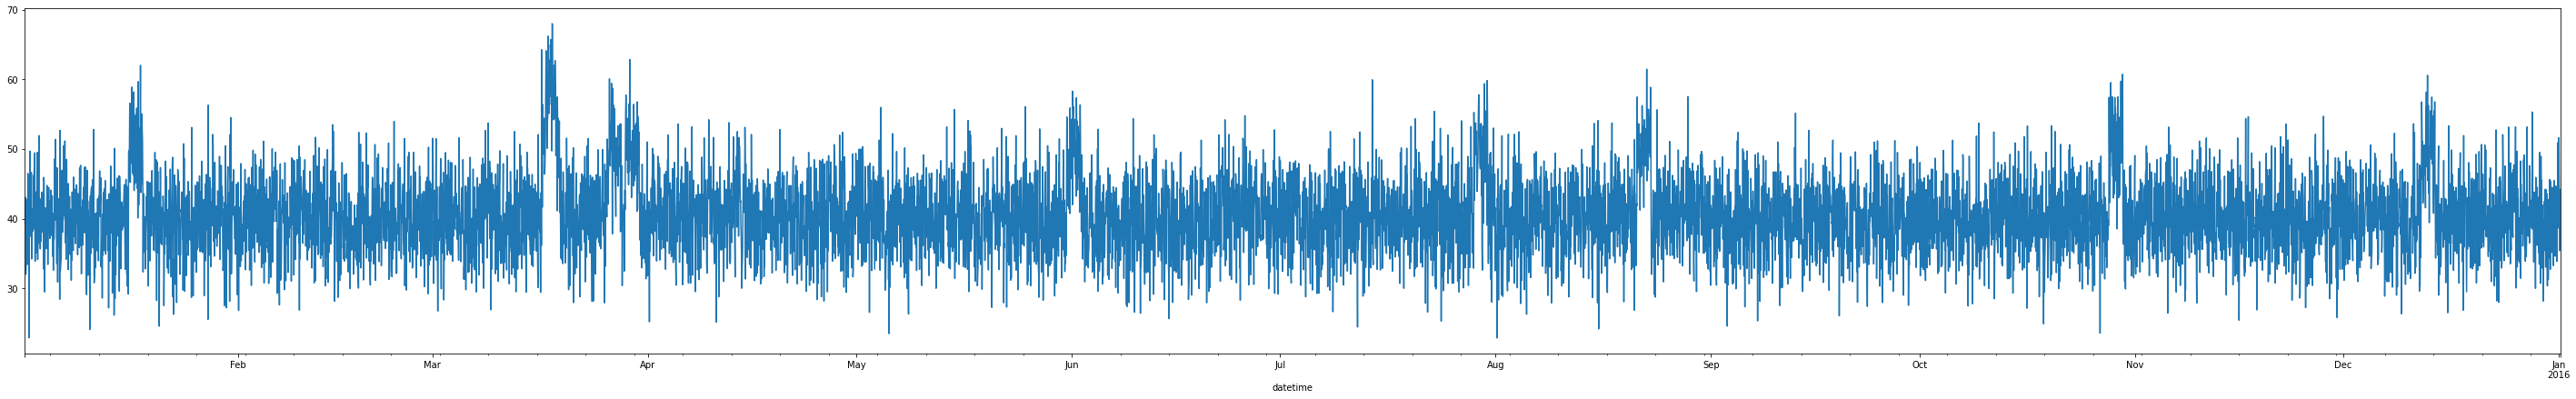

In [20]:
df.vibration[df["machineID"]==machine].plot(figsize=(50,7))

¿Realmente nos aporta algo el datetime?

In [21]:
df_98.reset_index(inplace=True)
df_98.drop("datetime", axis=1, inplace=True)
print(df_98.shape)
df_98.head(2)

(8761, 5)


,volt,rotate,pressure,vibration,failure
0,168.596133,384.747105,110.921131,41.944692,0
1,153.667693,441.288719,128.011446,39.271527,0


array([[<AxesSubplot:title={'center':'volt'}>,
        <AxesSubplot:title={'center':'rotate'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'vibration'}>],
       [<AxesSubplot:title={'center':'failure'}>, <AxesSubplot:>]],
      dtype=object)

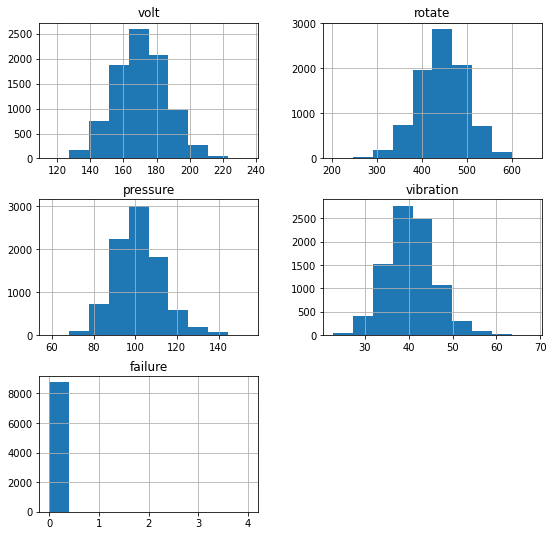

In [22]:
df_98.hist(figsize=(9,9))

Durante el curso veran las formas de mejorar este codigo, pero pidieron ejemplos de la vida real y aqui estan:)

Separamos las x y las y

In [23]:
y=df_98["failure"]
print(y.head(2))
x=df_98.drop('failure', axis=1, inplace=False)
print(x.head(2))


0    0
1    0
Name: failure, dtype: int64
         volt      rotate    pressure  vibration
0  168.596133  384.747105  110.921131  41.944692
1  153.667693  441.288719  128.011446  39.271527


Hacemos el split de nuestros datos

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

NameError: name 'MinMaxScaler' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
print(accuracy_score(y_test, y_pred))

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)